In [2]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
!kaggle datasets download -d chrisfilo/fruit-recognition

100% 7.90G/7.92G [03:05<00:00, 34.6MB/s]
100% 7.92G/7.92G [03:05<00:00, 45.8MB/s]


In [6]:
!7z x fruit-recognition.zip



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 8501391916 bytes (8108 MiB)

Extracting archive: fruit-recognition.zip
  5% 4096 Open              --
Path = fruit-recognition.zip
Type = zip
Physical Size = 8501391916
64-bit = +

  0%      0% 40 - Apple/Apple A/Apple 135.png                                       0% 72 - Apple/Apple A/Apple 164.png                                       0% 103 - Apple/Apple A/Apple 192.png                                        0% 152 - Apple/Apple A/Apple 236.png

# Creating a df with the paths

In [12]:
import pandas as pd
import numpy as np
import os 
import cv2
import matplotlib.pyplot as plt

In [22]:
apple_path = '/content/Apple'
banana_path = '/content/Banana'
carambola_path = '/content/Carambola'
guava_path = '/content/Guava'
kiwi_path = '/content/Kiwi'
mango_path = '/content/Mango'
muskmelon_path = '/content/muskmelon'
orange_path = '/content/Orange'
peach_path =  '/content/Peach'
pear_path = '/content/Pear'
persimmon_path = '/content/Persimmon'
pitaya_path = '/content/Pitaya'
plum_path = '/content/Plum'
pomegranate_path = '/content/Pomegranate'
tomatoes_path = '/content/Tomatoes'


In [23]:
list_of_paths = [apple_path, banana_path, carambola_path, guava_path,
                kiwi_path, mango_path, muskmelon_path, orange_path,
                peach_path, pear_path, persimmon_path, pitaya_path,
                plum_path, pomegranate_path, tomatoes_path]

In [24]:
list_of_paths[0]

'/content/Apple'

In [28]:
def data_frame_gen(list_of_paths):
    all_files = []
    for path in list_of_paths:
        
        for dirpath, _, filenames in os.walk(path):
            for fn in filenames:
                all_files.append(os.path.join(dirpath, fn))
    
    img_df = pd.DataFrame({'Path': all_files})
    
    img_df['Fruit'] = img_df['Path'].apply(lambda p: p.split(os.sep)[2])
    img_df = img_df[['Fruit', 'Path']]            
    
    return img_df


In [29]:
df = data_frame_gen(list_of_paths)

In [30]:
df

,Fruit,Path
0,Apple,/content/Apple/Apple B/481red applee00201481.png
1,Apple,/content/Apple/Apple B/71red applee0036171.png
2,Apple,/content/Apple/Apple B/169red applee02116169.png
3,Apple,/content/Apple/Apple B/487red applee00561487.png
4,Apple,/content/Apple/Apple B/340red applee04966340.png
...,...,...
70544,Tomatoes,/content/Tomatoes/Tamotoes001883.png
70545,Tomatoes,/content/Tomatoes/Tamotoes001301.png
70546,Tomatoes,/content/Tomatoes/Tamotoes001523.png
70547,Tomatoes,/content/Tomatoes/Tamotoes001885.png


In [31]:
df.groupby('Fruit').count()


,Path
Fruit,
Apple,11185
Banana,3027
Carambola,2080
Guava,19698
Kiwi,8465
Mango,4154
Orange,3012
Peach,2629
Pear,3012


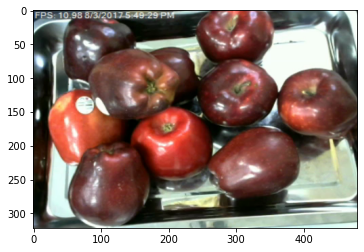

In [33]:
img = cv2.imread(df['Path'][1], cv2.COLOR_BGR2RGB)
img_GRB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_GRB)
#print(img_GRB)
plt.show()

In [34]:
df.shape

(70549, 2)

In [35]:
df

,Fruit,Path
0,Apple,/content/Apple/Apple B/481red applee00201481.png
1,Apple,/content/Apple/Apple B/71red applee0036171.png
2,Apple,/content/Apple/Apple B/169red applee02116169.png
3,Apple,/content/Apple/Apple B/487red applee00561487.png
4,Apple,/content/Apple/Apple B/340red applee04966340.png
...,...,...
70544,Tomatoes,/content/Tomatoes/Tamotoes001883.png
70545,Tomatoes,/content/Tomatoes/Tamotoes001301.png
70546,Tomatoes,/content/Tomatoes/Tamotoes001523.png
70547,Tomatoes,/content/Tomatoes/Tamotoes001885.png


In [36]:
## Removing DS_store

for path in df.Path:
    count_to_drop = 0 
    if 'DS_Store'in str(path):
        df = df.drop(df.index[count_to_drop])
    count_to_drop = count_to_drop + 1
        

In [37]:
df

,Fruit,Path
0,Apple,/content/Apple/Apple B/481red applee00201481.png
1,Apple,/content/Apple/Apple B/71red applee0036171.png
2,Apple,/content/Apple/Apple B/169red applee02116169.png
3,Apple,/content/Apple/Apple B/487red applee00561487.png
4,Apple,/content/Apple/Apple B/340red applee04966340.png
...,...,...
70544,Tomatoes,/content/Tomatoes/Tamotoes001883.png
70545,Tomatoes,/content/Tomatoes/Tamotoes001301.png
70546,Tomatoes,/content/Tomatoes/Tamotoes001523.png
70547,Tomatoes,/content/Tomatoes/Tamotoes001885.png


## Preping the data 

In [38]:
# Shuffling data

from sklearn.utils import shuffle

df = shuffle(df, random_state = 0)

df = df.reset_index(drop=True)

df

,Fruit,Path
0,Apple,/content/Apple/Total Number of Apples/Apple 03...
1,Apple,/content/Apple/Total Number of Apples/Apple_0_...
2,Kiwi,/content/Kiwi/Total Number of Kiwi fruit/Kiwi0...
3,Pomegranate,/content/Pomegranate/Pomegranet002045.png
4,Guava,/content/Guava/guava total final/Guava0523.png
...,...,...
70544,Guava,/content/Guava/Guava total/1Guavaã2793 resiz...
70545,Mango,/content/Mango/Mango003701.png
70546,Kiwi,/content/Kiwi/Total Number of Kiwi fruit/Kiwi0...
70547,Kiwi,/content/Kiwi/Kiwi C/Kiwi C00672.png


In [39]:
# adding a label to the data 

fruit_names = sorted(df.Fruit.unique())
mapper_fruit_names = dict(zip(fruit_names, [t for t in range(len(fruit_names))]))
df["label"] = df["Fruit"].map(mapper_fruit_names)
print(mapper_fruit_names)

# Visualize the resulting dataframe
df.head()

{'Apple': 0, 'Banana': 1, 'Carambola': 2, 'Guava': 3, 'Kiwi': 4, 'Mango': 5, 'Orange': 6, 'Peach': 7, 'Pear': 8, 'Persimmon': 9, 'Pitaya': 10, 'Plum': 11, 'Pomegranate': 12, 'Tomatoes': 13, 'muskmelon': 14}


,Fruit,Path,label
0,Apple,/content/Apple/Total Number of Apples/Apple 03...,0
1,Apple,/content/Apple/Total Number of Apples/Apple_0_...,0
2,Kiwi,/content/Kiwi/Total Number of Kiwi fruit/Kiwi0...,4
3,Pomegranate,/content/Pomegranate/Pomegranet002045.png,12
4,Guava,/content/Guava/guava total final/Guava0523.png,3


# Preping to model

In [40]:
# Reshaping the image

In [41]:
def load_img(df):
# Load the images using their contained in the dataframe df
# Return a list of images and a list with the labels of the images
    img_paths = df["Path"].values
    img_labels = df["Fruit"].values
    X = []
    y = []
    
    for i,path in enumerate(img_paths):
        img =  cv2.imread(path)
        img = cv2.resize(img, (150,150))
        label = img_labels[i]
        X.append(img)
        y.append(label)
    return np.array(X),np.array(y)

X, y = load_img(df)



array([[[[ 41,  39,  29],
         [ 34,  36,  32],
         [ 31,  37,  33],
         ...,
         [ 80,  86,  68],
         [155, 148, 126],
         [147, 134, 111]],

        [[ 35,  38,  27],
         [ 39,  39,  26],
         [ 37,  39,  33],
         ...,
         [ 26,  32,  14],
         [110, 106,  86],
         [160, 151, 126]],

        [[ 37,  36,  28],
         [173, 175, 168],
         [126, 130, 125],
         ...,
         [ 18,  27,  11],
         [ 28,  33,  13],
         [136, 140, 115]],

        ...,

        [[ 49,  58,  43],
         [ 39,  49,  33],
         [ 54,  63,  48],
         ...,
         [  0,  10,   0],
         [  0,  10,   0],
         [  0,  10,   0]],

        [[ 64,  73,  58],
         [ 41,  50,  35],
         [ 42,  51,  36],
         ...,
         [  0,  10,   0],
         [  0,  10,   0],
         [  0,  10,   0]],

        [[ 73,  82,  67],
         [ 45,  55,  39],
         [ 37,  47,  32],
         ...,
         [  0,  10,   0],
        

In [42]:
X.shape

(70549, 150, 150, 3)

In [43]:
y.shape

(70549,)